In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from jasPyr import *
%matplotlib inline

We want to do the same analysis on a bunch of data. Assuming we have named our files in a logical way [numbering them], we can use the glob function to create an array of strings of pathnames to files using regular expressions (https://regex101.com/).

Naming files in a useful way is important, a bit of forsight will go a long way. Here, the first integer is the number of 0.05m tube sections used to make the tube. The second integer is the trial number.

In [12]:
files = sorted(glob.glob("./QMAnalogData/*.dat"))
print files

['./QMAnalogData/1_1.dat', './QMAnalogData/1_2.dat', './QMAnalogData/1_3.dat', './QMAnalogData/2_1.dat', './QMAnalogData/2_2.dat', './QMAnalogData/2_3.dat', './QMAnalogData/3_1.dat', './QMAnalogData/3_2.dat', './QMAnalogData/3_3.dat', './QMAnalogData/4_1.dat', './QMAnalogData/4_2.dat', './QMAnalogData/4_3.dat', './QMAnalogData/5_1.dat', './QMAnalogData/5_2.dat', './QMAnalogData/5_3.dat', './QMAnalogData/6_1.dat', './QMAnalogData/6_2.dat', './QMAnalogData/6_3.dat', './QMAnalogData/7_1.dat', './QMAnalogData/7_2.dat', './QMAnalogData/7_3.dat', './QMAnalogData/8_1.dat', './QMAnalogData/8_2.dat', './QMAnalogData/8_3.dat']


Now we want to loop over the files and do stuff

In [11]:
for i in files:
    print i.split('/')[2].split('.')[0]

1_1
1_2
1_3
2_1
2_2
2_3
3_1
3_2
3_3
4_1
4_2
4_3
5_1
5_2
5_3
6_1
6_2
6_3
7_1
7_2
7_3
8_1
8_2
8_3


In [18]:
for i in files:
    nTube =  i.split('/')[2].split('.')[0].split('_')[0]
    trial = i.split('/')[2].split('.')[0].split('_')[1]
    print int(nTube)*0.05, trial

0.05 1
0.05 2
0.05 3
0.1 1
0.1 2
0.1 3
0.15 1
0.15 2
0.15 3
0.2 1
0.2 2
0.2 3
0.25 1
0.25 2
0.25 3
0.3 1
0.3 2
0.3 3
0.35 1
0.35 2
0.35 3
0.4 1
0.4 2
0.4 3


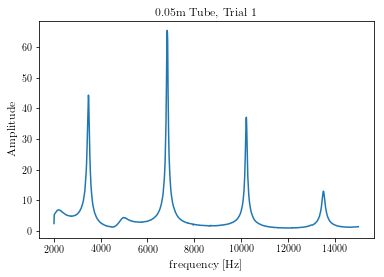

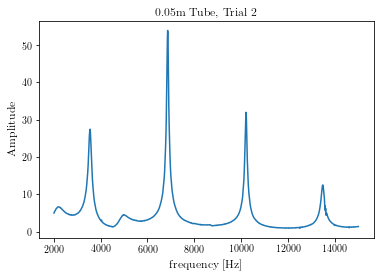

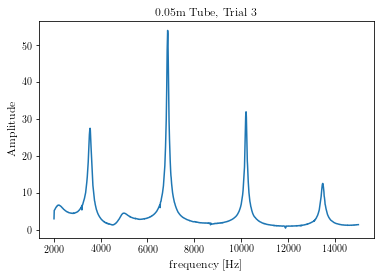

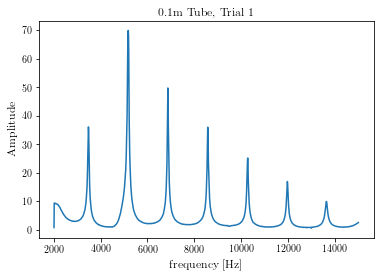

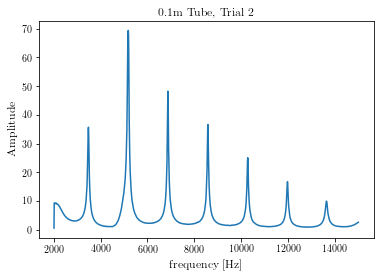

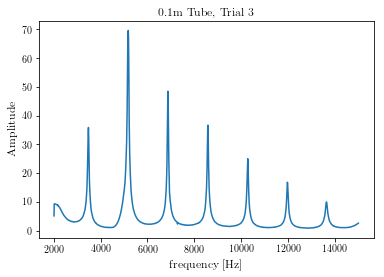

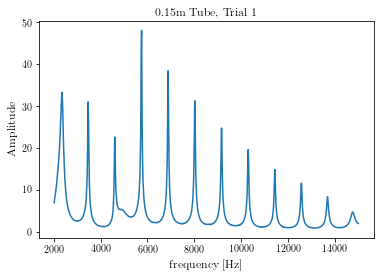

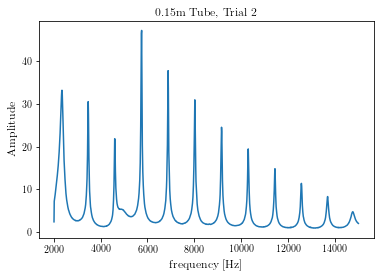

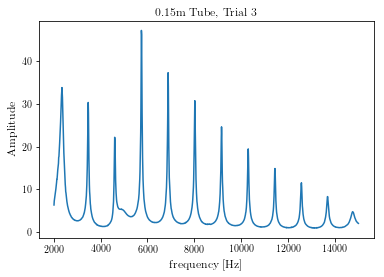

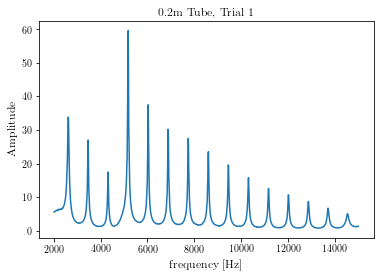

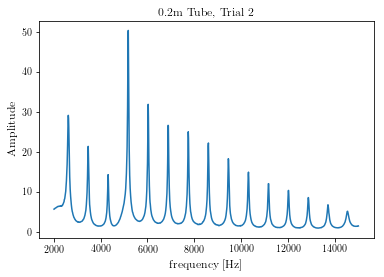

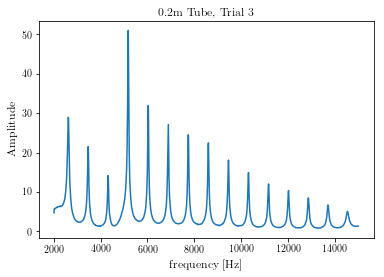

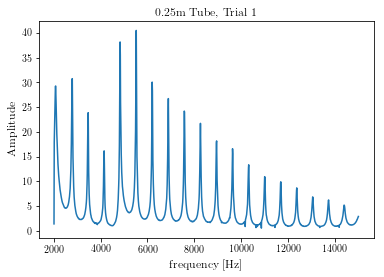

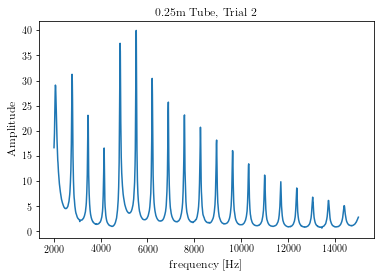

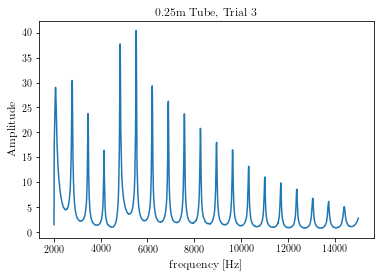

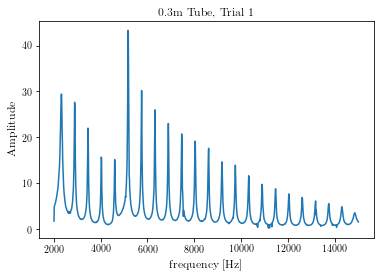

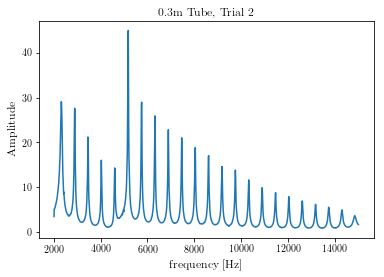

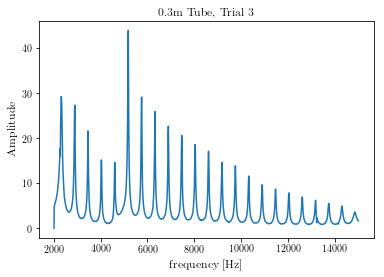

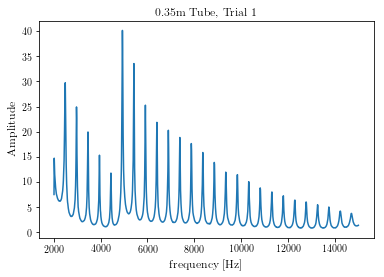

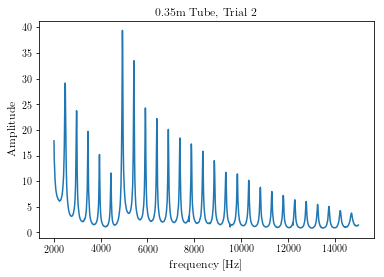

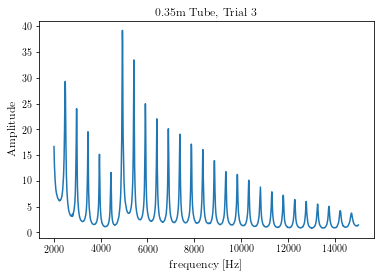

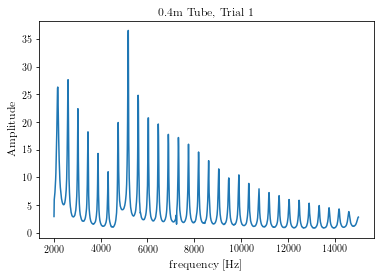

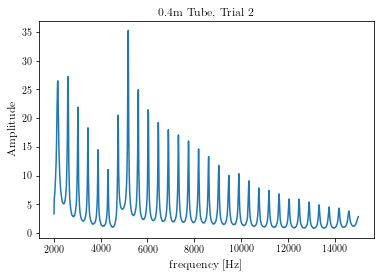

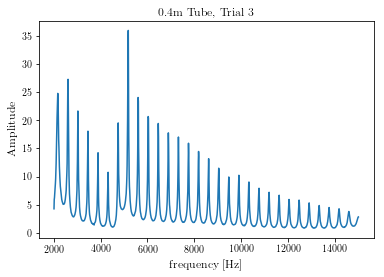

In [25]:
for i in files:
    nTube =  i.split('/')[2].split('.')[0].split('_')[0]
    trial = i.split('/')[2].split('.')[0].split('_')[1]
    
    f, a = np.loadtxt(i, unpack = True)
    plt.title(str(int(nTube)*0.05)+"m Tube, Trial "+trial)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.plot(f,a)
    plt.show()
    plt.close()

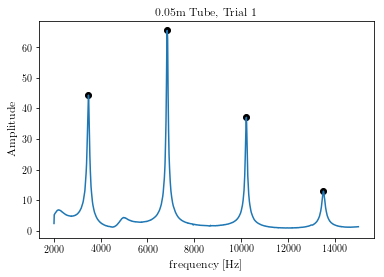

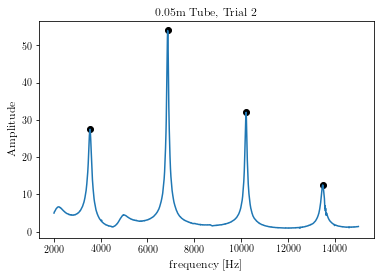

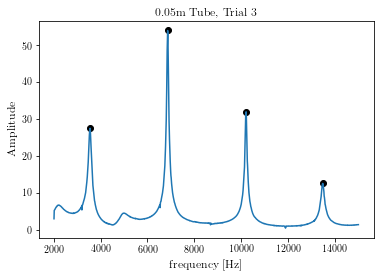

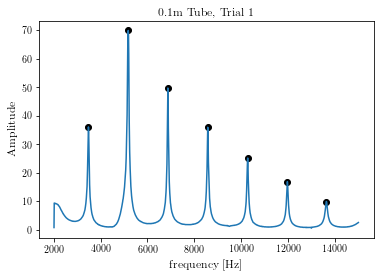

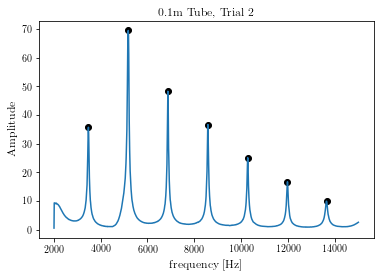

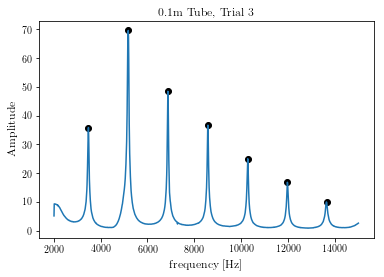

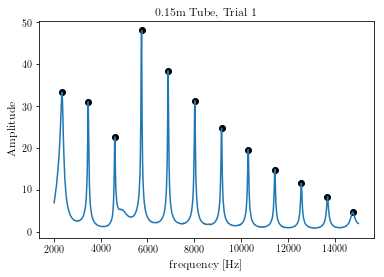

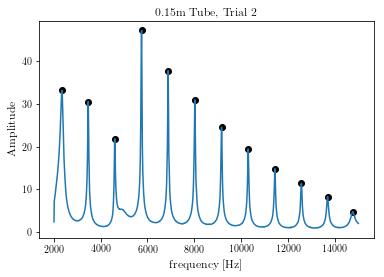

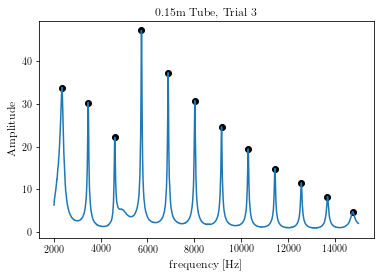

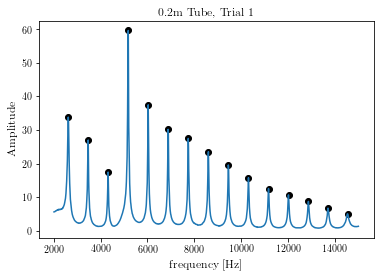

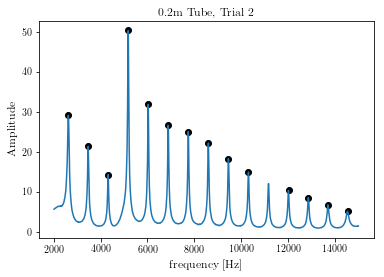

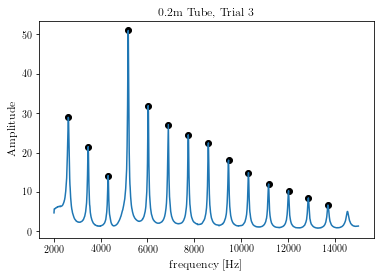

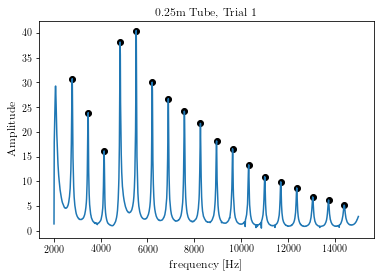

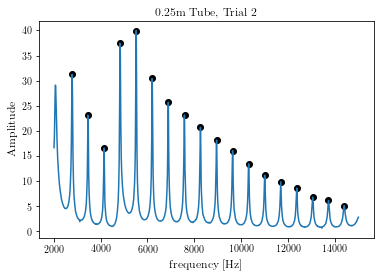

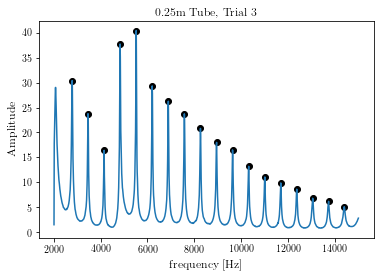

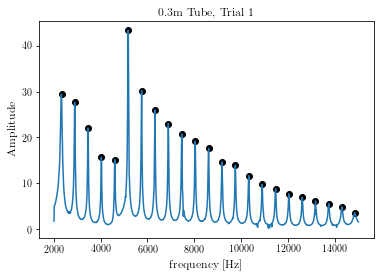

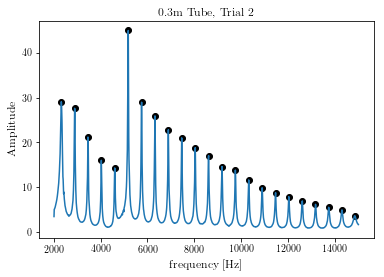

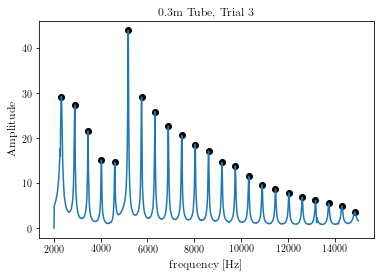

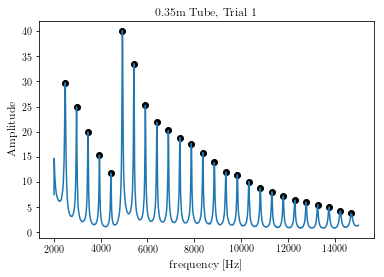

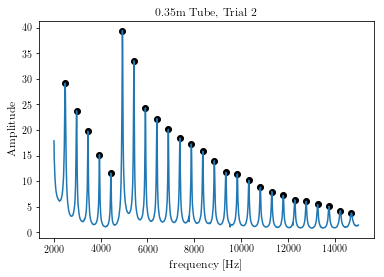

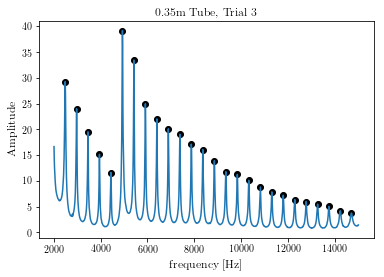

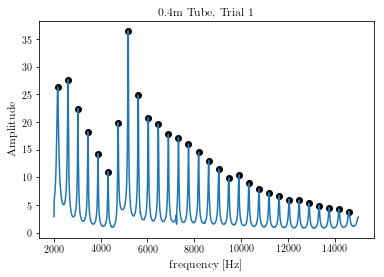

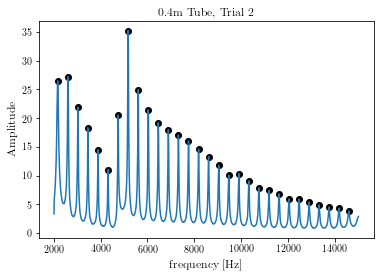

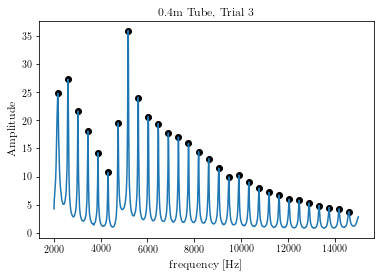

In [43]:
for i in files:
    nTube =  i.split('/')[2].split('.')[0].split('_')[0]
    trial = i.split('/')[2].split('.')[0].split('_')[1]
    f, a = np.loadtxt(i, unpack = True)
    
    peakInd = findpeaks(a, 120/int(nTube))
    peakInd = peakInd[(peakInd>10) & (peakInd<(len(a)-10))]
    plt.scatter(f[peakInd], a[peakInd], c= 'k')
    
    plt.title(str(int(nTube)*0.05)+"m Tube, Trial "+trial)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.plot(f,a)
    plt.show()
    plt.close()

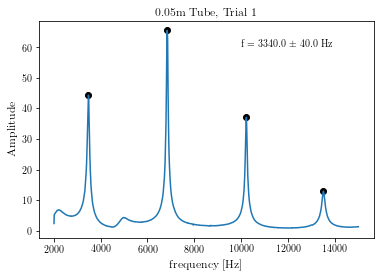

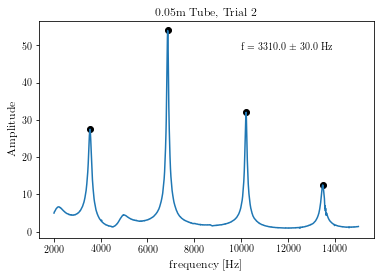

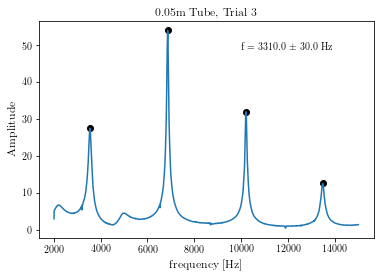

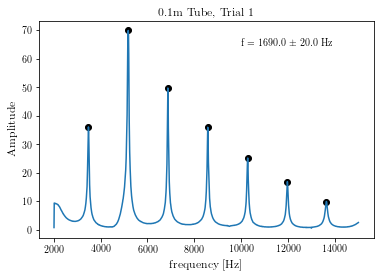

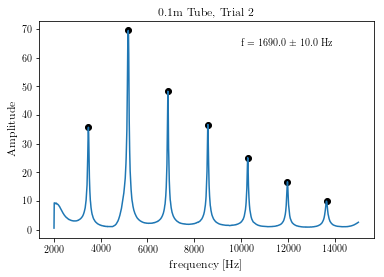

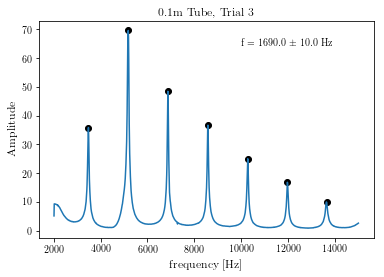

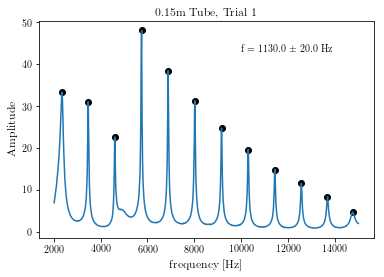

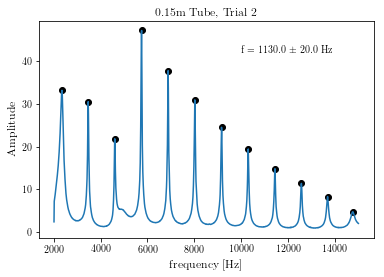

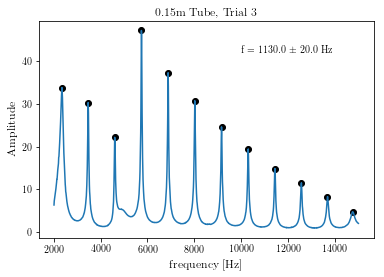

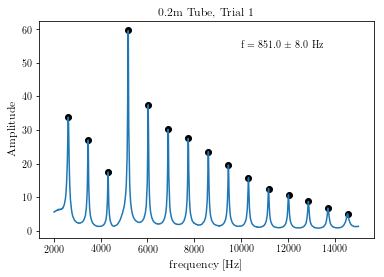

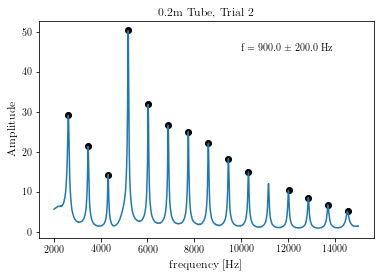

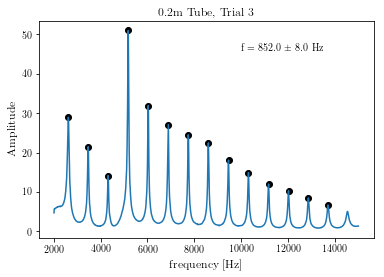

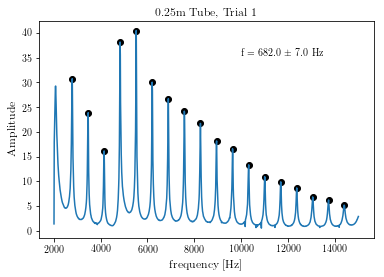

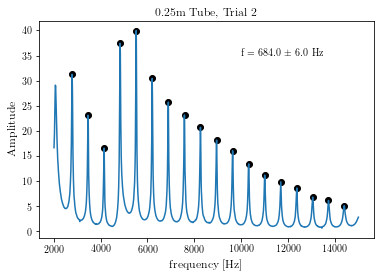

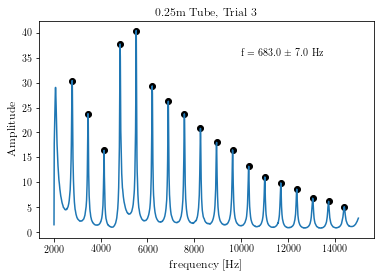

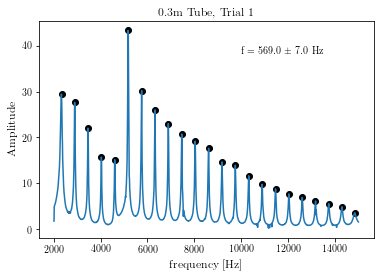

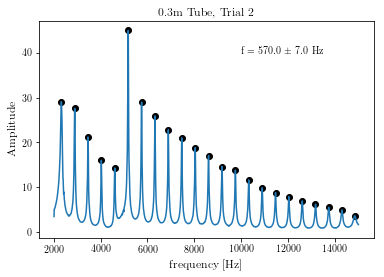

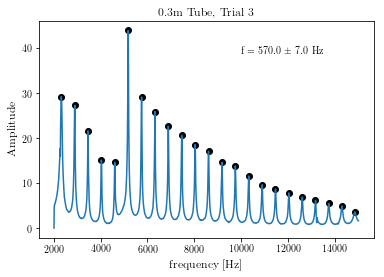

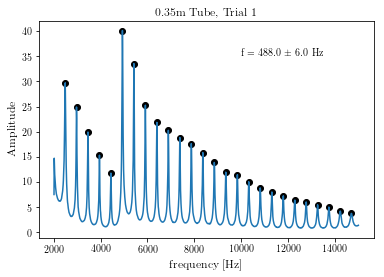

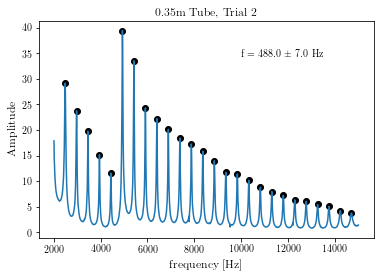

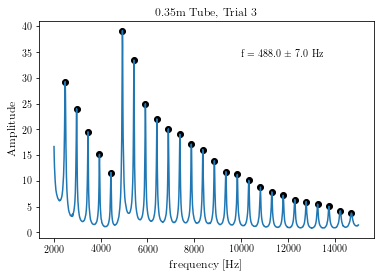

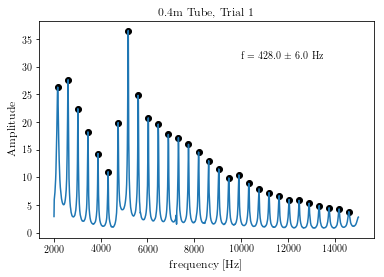

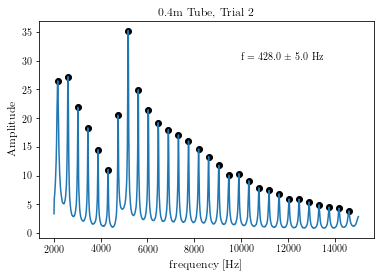

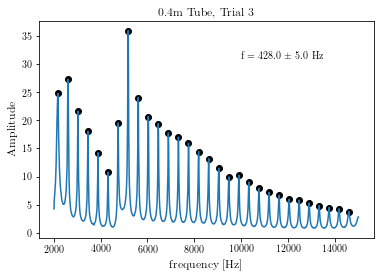

In [45]:
for i in files:
    nTube =  i.split('/')[2].split('.')[0].split('_')[0]
    trial = i.split('/')[2].split('.')[0].split('_')[1]
    f, a = np.loadtxt(i, unpack = True)
    
    peakInd = findpeaks(a, 120/int(nTube))
    peakInd = peakInd[(peakInd>10) & (peakInd<(len(a)-10))]
    plt.scatter(f[peakInd], a[peakInd], c= 'k')
    
    F = np.average(np.diff(f[peakInd]))
    eF = np.std(np.diff(f[peakInd]))
    plt.text(10000, np.max(a)-5, "f = " + fmtUncty(F,eF, LaTeX = True)+" Hz")
    
    plt.title(str(int(nTube)*0.05)+"m Tube, Trial "+trial)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.plot(f,a)
    plt.show()
    plt.close()